PURPOSE: Illustrate the concept of bias and variance for quadratic estimators. Case of polarization intensity.

Notation: variables with index 0 correspond to true values (P0).

@author: jalberto

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import sys

In [32]:
# WK estimator
def p_wk(P, sigma):
    arg = P**2 - sigma**2
    Pwk = np.zeros(len(P))
    cut = arg>0
    Pwk[cut] = np.sqrt(arg[cut])
    #Pwk = np.where(arg>0, np.sqrt(arg), 0)
    return Pwk

# MAS estimator
def p_mas(P, sigma):
    sigchi = sigma/(2*P) 
    Pmas   = P * ( 1 - 2*sigchi**2 * (1-np.exp(-P**2/sigma**2)))
    return Pmas

FIRST Example: simulating a measurement in which the intrisic polarization is zero.

In [33]:
nsim = 50000
    
# CASE 1. Intrinsic polarization is zero Q0=U0=0
Q0    = 0.0
U0    = 0.0
P0    = np.sqrt(Q0**2 + U0**2)
sigma = 1.0  # error in Q or U measuremnt.

# Simulating Measurements
n = nsim # number of measurements.    
Q = Q0 + np.random.randn(n)*sigma
U = U0 + np.random.randn(n)*sigma

# Measured value of P (classical method, biased):
P = np.sqrt(Q**2 + U**2)
errP = sigma

# Compute some statistics:
print("CASE 1. Intrinsic P0 = ",P0)
print("> Mean value of Q = ",np.mean(Q))
print("> Standard deviation of Q   = ",np.std(Q))
print("> Mean value of U = ",np.mean(U))
print("> Standard deviation of U   = ",np.std(U))
    
print("> Mean value of P = ",np.mean(P))
print("> Standard deviation of P   = ",np.std(P))

print('Biased-corrected estimators:')
PWK  = p_wk(P,sigma)
print("> Mean value of PWK = ",np.mean(PWK))
Pmas = p_mas(P,sigma)
print("> Mean value of Pmas= ",np.mean(Pmas))
print("----------")

CASE 1. Intrinsic P0 =  0.0
> Mean value of Q =  0.0046412177851683405
> Standard deviation of Q   =  1.0023405924210844
> Mean value of U =  0.002443932098308113
> Standard deviation of U   =  1.0034432194166152
> Mean value of P =  1.2576079086137197
> Standard deviation of P   =  0.6557704016704993
Biased-corrected estimators:
> Mean value of PWK =  0.7673062032381426
> Mean value of Pmas=  0.9929383385945802
----------


The resulting P is biased. The two considered estimators partially correct for that bias.
The posterior (distribution of P values) is given by a Rice function:

(array([8.070e+02, 2.090e+03, 3.251e+03, 4.093e+03, 4.743e+03, 4.890e+03,
        5.105e+03, 4.775e+03, 4.362e+03, 3.795e+03, 3.098e+03, 2.533e+03,
        1.919e+03, 1.482e+03, 1.034e+03, 7.260e+02, 4.770e+02, 3.320e+02,
        2.110e+02, 1.070e+02, 7.400e+01, 3.600e+01, 2.600e+01, 1.400e+01,
        1.200e+01, 4.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0.00701988, 0.17528405, 0.34354823, 0.51181241, 0.68007659,
        0.84834077, 1.01660495, 1.18486913, 1.35313331, 1.52139749,
        1.68966167, 1.85792585, 2.02619002, 2.1944542 , 2.36271838,
        2.53098256, 2.69924674, 2.86751092, 3.0357751 , 3.20403928,
        3.37230346, 3.54056764, 3.70883181, 3.87709599, 4.04536017,
        4.21362435, 4.38188853, 4.55015271, 4.71841689, 4.88668107,
        5.05494525]),
 <BarContainer object of 30 artists>)

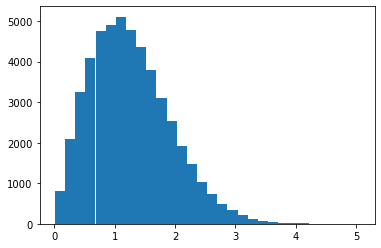

In [34]:
plt.hist(P,bins=30)

SECOND Example: simulating a measurement in which the intrisic polarization non zero, but small compared to the typical error.

In [35]:
Q0    = 1.0
U0    = 0.0
P0    = np.sqrt(Q0**2 + U0**2)
sigma = 1.0  # error in Q or U measuremnt.
    
# simulating Measurements
n     = nsim  # number of measurements.    
Q = Q0 + np.random.randn(n)*sigma
U = U0 + np.random.randn(n)*sigma

# Measured value of P (clasical method):
P = np.sqrt(Q**2 + U**2)
errP = sigma

# Compute some statistics:
print("CASE 2. Intrinsic P0 = ",P0)
print("> Mean value of Q = ",np.mean(Q))
print("> Standard deviation of Q   = ",np.std(Q))
print("> Mean value of U = ",np.mean(U))
print("> Standard deviation of U   = ",np.std(U))
    
print("> Mean value of P = ",np.mean(P))
print("> Standard deviation of P   = ",np.std(P))

print('Biased-corrected estimators:')
PWK = p_wk(P,sigma)
print("> Mean value of PWK = ",np.mean(PWK))
Pmas = p_mas(P,sigma)
print("> Mean value of Pmas= ",np.mean(Pmas))
print("----------")

CASE 2. Intrinsic P0 =  1.0
> Mean value of Q =  0.9943338286884176
> Standard deviation of Q   =  1.000100607426217
> Mean value of U =  0.0002177899955499722
> Standard deviation of U   =  0.9924942427227619
> Mean value of P =  1.5424965277608766
> Standard deviation of P   =  0.7711357331653136
Biased-corrected estimators:
> Mean value of PWK =  1.1100896366356665
> Mean value of Pmas=  1.2852075322563667
----------


THIRD Example: simulating a measurement in which the intrisic polarization non zero, with an amplitude around 3-4 sigma levels (low signal to noise)

In [36]:
# CASE 3. Realistic case
Q0    = 3.0
U0    = 4.0
P0    = np.sqrt(Q0**2 + U0**2)
sigma = 1.0  # error in Q or U measuremnt.
    
# Measurements
n = nsim  # number of measurements.    
Q = Q0 + np.random.randn(n)*sigma
U = U0 + np.random.randn(n)*sigma
    
# Measured value of P (clasical method):
P = np.sqrt(Q**2 + U**2)
errP = sigma # quadratic.

# Compute some statistics:
print("CASE 3. Intrinsic P0 = ",P0)
print("> Mean value of Q = ",np.mean(Q))
print("> Standard deviation of Q   = ",np.std(Q))
print("> Mean value of U = ",np.mean(U))
print("> Standard deviation of U   = ",np.std(U))
    
print("> Mean value of P = ",np.mean(P))
print("> Standard deviation of P   = ",np.std(P))

print('Biased-corrected estimators:')
PWK = p_wk(P,sigma)
print("> Mean value of PWK = ",np.mean(PWK))
Pmas = p_mas(P,sigma)
print("> Mean value of Pmas= ",np.mean(Pmas))

CASE 3. Intrinsic P0 =  5.0
> Mean value of Q =  2.998223613620086
> Standard deviation of Q   =  0.9968073957620236
> Mean value of U =  4.002467665533887
> Standard deviation of U   =  1.0004559971127018
> Mean value of P =  5.101419173480837
> Standard deviation of P   =  0.9895210223942167
Biased-corrected estimators:
> Mean value of PWK =  4.997891854341078
> Mean value of Pmas=  4.999230577311068


In this case, the bias is well corrected.